In [1]:
import os

os.makedirs("Lab_4.2/output", exist_ok=True)
print("Lab_4.2/output folder created!")

Lab_4.2/output folder created!


In [2]:
!apt-get install tesseract-ocr -y
!pip install pytesseract opencv-python pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [3]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import re
import json
from PIL import Image

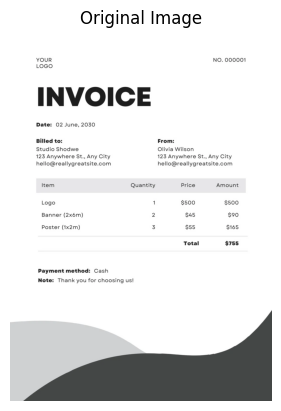

Extracted Text (Without Preprocessing):

YOUR
LOGO

INVOICE

Date: 02 June, 2030

Billed to:

Studio Shodwe

123 Anywhere St., Any City
hello@reallygreatsite.com

Item

Logo
Banner (2x6m)

Poster (1x2m)

Payment method: Cash

Quantity

Note: Thank you for choosing us!

NO. 000001

From:

Olivia Wilson

123 Anywhere St., Any City
hello@reallygreatsite.com

Price Amount
$500 $500
$45 $90
$55 $165
Total $755

 



In [4]:
image_path = "invoice.webp"

# Load image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

# Extract text (Basic OCR)
basic_text = pytesseract.image_to_string(img_rgb)

print("Extracted Text (Without Preprocessing):\n")
print(basic_text)

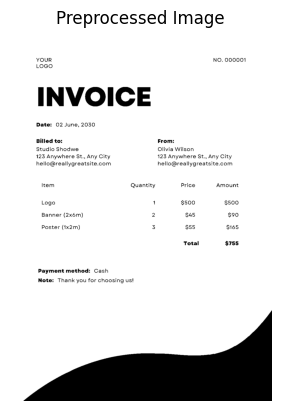

Extracted Text (After Preprocessing):

YOUR
LOGO

No. 000001

INVOICE

Date: 02 June, 2030

Billed to:

Studio Shodwe

123 Anywhere St., Any City
hello@reallygreatsite.com

Item

Logo
Banner (2x6m)

Poster (1x2m)

Payment method: Cash

From:

Olivia Wilson

123 Anywhere St., Any City
hello@reallygreatsite.com

Quantity Price Amount
1 $500 $500

2 $45 $90

3 $55 $165

Total $755

Note: Thank you for choosing us!

 



In [5]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply threshold (improves OCR accuracy)
_, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

# Show preprocessed image
plt.imshow(thresh, cmap='gray')
plt.title("Preprocessed Image")
plt.axis("off")
plt.show()

# OCR after preprocessing
processed_text = pytesseract.image_to_string(thresh)

print("Extracted Text (After Preprocessing):\n")
print(processed_text)

In [6]:
# Extract date patterns (DD/MM/YYYY or similar)
dates = re.findall(r'\d{1,2}[/-]\d{1,2}[/-]\d{2,4}', processed_text)

# Extract currency amounts
amounts = re.findall(r'₹?\$?\d+(?:,\d{3})*(?:\.\d{2})?', processed_text)

# Extract emails
emails = re.findall(r'[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}', processed_text)

print("Dates Found:", dates)
print("Amounts Found:", amounts)
print("Emails Found:", emails)

Dates Found: []
Amounts Found: ['000001', '02', '2030', '123', '2', '6', '1', '2', '123', '1', '$500', '$500', '2', '$45', '$90', '3', '$55', '$165', '$755']
Emails Found: ['hello@reallygreatsite.com', 'hello@reallygreatsite.com']


In [8]:
output_data = {
    "basic_ocr_text": basic_text,
    "processed_ocr_text": processed_text,
    "dates": dates,
    "amounts": amounts,
    "emails": emails
}

# Save JSON file
with open("Lab_4.2/output/ocr_results.json", "w") as f:
    json.dump(output_data, f, indent=4)

print("OCR results saved in Lab_4.2/output/ocr_results.json")

OCR results saved in Lab_4.2/output/ocr_results.json
